In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

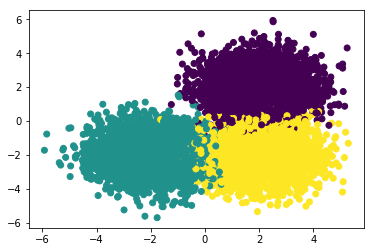

In [70]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

centers = [[2,2], [-2,-2], [2,-2]]

X, y = make_blobs(n_samples=10000, centers=centers, cluster_std=1, n_features=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [71]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters : {}'.format(n_clusters_))

Number of estimated clusters : 3


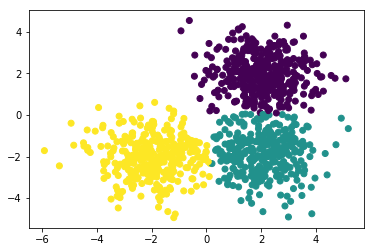

comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [72]:
plt.scatter(X_train[:,0], X_train[:,1], c=labels)
plt.show()

print('comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, labels))

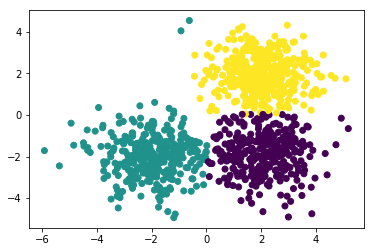

comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       10    2  350
1        9  310    1
2      305    6    7


In [73]:
from sklearn.cluster import SpectralClustering

n_clusters=3

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict=sc.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1], c=predict)
plt.show()

print('comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))

In [74]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(X_train)
print('Done')

cluster_centers_indices= af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 93


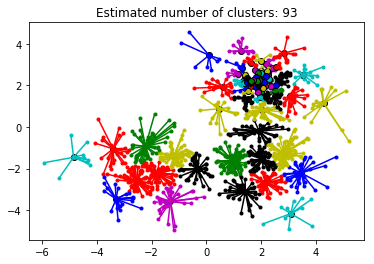

In [75]:
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1],col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

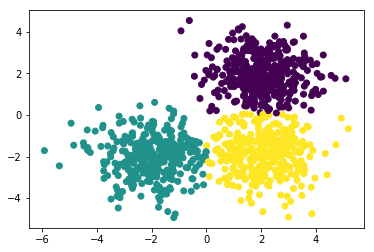

In [76]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=y_pred)
plt.show()

### Method 1

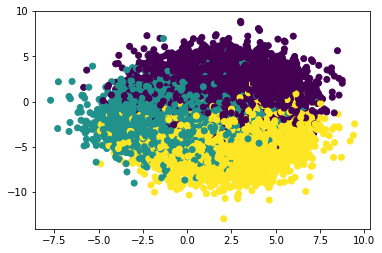

In [77]:
centers = [[2,1], [0,-2], [2,-4]]

X, y = make_blobs(n_samples=20000, centers=centers, cluster_std=2, n_features=4, random_state=42)
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

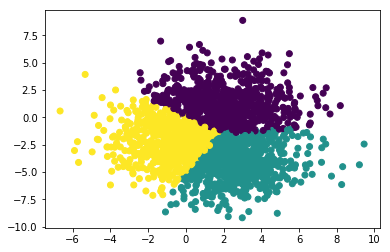

In [78]:
#KMeans

y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=y_pred)
plt.show()

In [79]:
#Mean Shift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=100)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters : {}'.format(n_clusters_))

Number of estimated clusters : 1


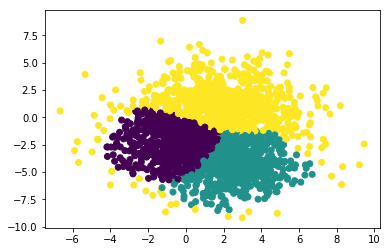

comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       74   50  543
1      407  114  142
2      166  430   74


In [80]:
#spectral clustering

n_clusters=3

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict=sc.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1], c=predict)
plt.show()

print('comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))


In [81]:
# Affinity Propagation

af = AffinityPropagation().fit(X_train)
print('Done')

cluster_centers_indices= af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 314


Affinity propagation as expected overestimated the number of clusters. Spectral clustering had the greatest run time and did not do a good job of defining each cluster.  The yellow points are circled around the other two clusters indicating poor performance.  

### Method 2

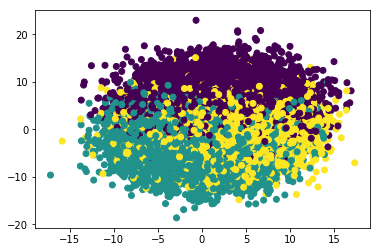

In [82]:
centers = [[2,5], [0,-2], [2,0]]

X, y = make_blobs(n_samples=50000, centers=centers, cluster_std=4, n_features=3, random_state=42)
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

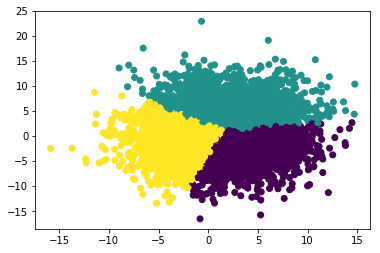

In [83]:
#KMeans

y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=y_pred)
plt.show()

In [84]:
#Mean Shift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=100)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters : {}'.format(n_clusters_))

Number of estimated clusters : 2


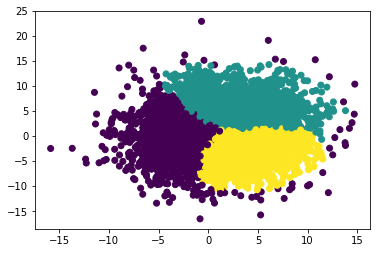

comparing the assigned categories to the ones in the data:
col_0    0     1    2
row_0                
0      331  1087  182
1      821   181  745
2      480   455  718


In [85]:
# Spectral Clustering


n_clusters=3

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict=sc.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1], c=predict)
plt.show()

print('comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))

In [86]:
# Affinity Propagation

af = AffinityPropagation().fit(X_train)
print('Done')

cluster_centers_indices= af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 1469


Affinity propagation had the longest run time and returned 1469 clusters.  As the dataset has grown, this model runs slower and overestimates the clusterse more and more.  The number of clusters could not be well predicted from the initial data so affinity propagation would not be a good choice here.  Spectral clustering did an okay job of defining clusters.  There are still many purple data points in and around the other two clusters.   Mean shift returned 2 clusters which may be pretty good for how the original data looked.  KMeans did a good job of separating the three clusters.  It has performed well in both methods.  For the final trial, I will decrease the dataset signifiantly and spread out the clusters. 

### Method 3

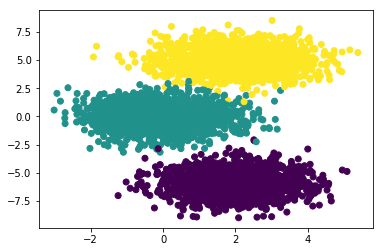

In [88]:
centers = [[2,-6], [0,0], [2,5]]

X, y = make_blobs(n_samples=5000, centers=centers, cluster_std=1, n_features=4, random_state=42)
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

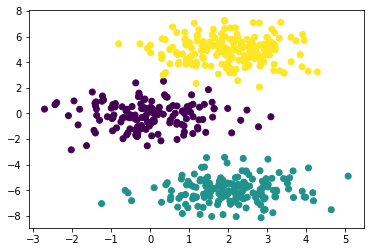

In [89]:
#KMeans

y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=y_pred)
plt.show()

In [90]:
#Mean Shift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=100)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters : {}'.format(n_clusters_))

Number of estimated clusters : 3


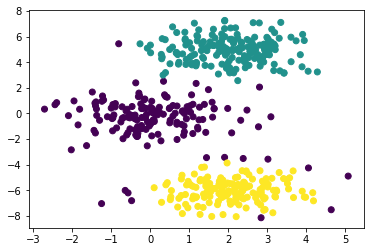

comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       12    0  157
1      147    0    0
2        2  182    0


In [95]:
# Spectral Clustering


n_clusters=3
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict=sc.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1], c=predict)
plt.show()

print('comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))

In [92]:
# Affinity Propagation

af = AffinityPropagation().fit(X_train)
print('Done')

cluster_centers_indices= af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 13


Small datasets are clearly meant for affinity propagation.  As the clusters were well defined in teh original data, the model still overestimated but not by as much as the previous methods.  Mean shift did a better job at estimating clusters with a smaller dataset and more well defined original data. In all cases, spectral clustering seems to have some overlap in the clusters which can be seen visually on the plots.  In all three models, KMeans performs quite well.